## METRICAS REGRESIÓN LOGÍSTICA

In [1]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score , cohen_kappa_score, roc_curve,roc_auc_score

import warnings
warnings.filterwarnings("ignore")

/home/sanfermen/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("../ficheros/02-Churm_estand_encod.csv", index_col= 0)
df.head()

,NumOfProducts,HasCrCard,IsActiveMember,Exited,CreditScore,Age,Tenure,Balance,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,1,1,1,-0.332983,0.490105,-1.041760,-1.225848,0.021886,1,0,0,1,0
1,1,0,1,0,-0.447572,0.374424,-1.387538,0.117350,0.216534,0,0,1,1,0
2,3,1,0,1,-1.551792,0.490105,1.032908,1.333053,0.240687,1,0,0,1,0
3,2,0,0,0,0.500391,0.143063,-1.387538,-1.225848,-0.108918,1,0,0,1,0
4,1,1,1,0,2.073384,0.605786,-1.041760,0.785728,-0.365276,0,0,1,1,0


Empezamos a entrenar nuestro modelo con los **datos estandarizados**

In [3]:
# separamos los datos en X e y

X1 = df.drop("Exited", axis = 1)
y1 = df["Exited"]

In [4]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

In [5]:
# definimos la regresión logistica

log_reg_esta = LogisticRegression(n_jobs=-1, max_iter = 1000)

# ajustamos el modelo
log_reg_esta.fit(x_train1,y_train1)

# obtenemos las predicciones para el conjunto de entrenamiento
y_pred_train_esta = log_reg_esta.predict(x_train1)

# obtenemos las predicciones para el conjunto de test
y_pred_test_esta = log_reg_esta.predict(x_test1)

/home/sanfermen/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
# hacemos un dataframe para comparar los resultados
train_df_esta = pd.DataFrame({'Real': y_train1, 'Predicted': y_pred_train_esta, 'Set': ['Train']*len(y_train1)})
test_df_esta  = pd.DataFrame({'Real': y_test1,  'Predicted': y_pred_test_esta,  'Set': ['Test']*len(y_test1)})
resultados = pd.concat([train_df_esta,test_df_esta], axis = 0)
resultados.head()

,Real,Predicted,Set
9254,0,0,Train
1561,0,0,Train
1670,1,0,Train
6087,1,0,Train
6669,1,1,Train


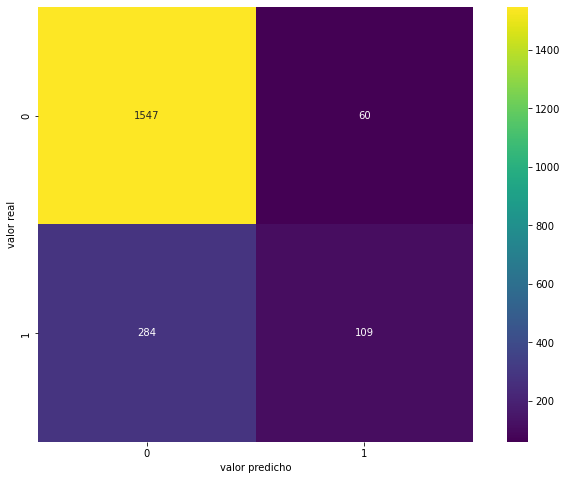

In [7]:
# Ploteamos la matriz de confusión
mat_lr1 = confusion_matrix(y_test1, y_pred_test_esta)

plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr1, square=True, annot=True, fmt="d", cmap = "viridis")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

In [8]:
# vamos a hacernos una función para sacar las métricas igual que hicimos con al regresión lineal.

def metricas(clases_reales_test, clases_predichas_test, clases_reales_train, clases_predichas_train, modelo):
    
    # para el test
    accuracy_test = accuracy_score(clases_reales_test, clases_predichas_test)
    precision_test = precision_score(clases_reales_test, clases_predichas_test)
    recall_test = recall_score(clases_reales_test, clases_predichas_test)
    f1_test = f1_score(clases_reales_test, clases_predichas_test)
    kappa_test = cohen_kappa_score(clases_reales_test, clases_predichas_test)

    # para el train
    accuracy_train = accuracy_score(clases_reales_train, clases_predichas_train)
    precision_train = precision_score(clases_reales_train, clases_predichas_train)
    recall_train = recall_score(clases_reales_train, clases_predichas_train)
    f1_train = f1_score(clases_reales_train, clases_predichas_train)
    kappa_train = cohen_kappa_score(clases_reales_train, clases_predichas_train)
    

    
    df = pd.DataFrame({"accuracy": [accuracy_test, accuracy_train], 
                       "precision": [precision_test, precision_train],
                       "recall": [recall_test, recall_train], 
                       "f1": [f1_test, f1_train],
                       "kappa": [kappa_test, kappa_train],
                       "set": ["test", "train"]})
    
    df["modelo"] = modelo
    return df

In [9]:
results_logistic_esta = metricas(y_test1, y_pred_test_esta, y_train1, y_pred_train_esta, "Regresión logistica Esta")
results_logistic_esta

,accuracy,precision,recall,f1,kappa,set,modelo
0,0.82800,0.644970,0.277354,0.387900,0.305868,test,Regresión logistica Esta
1,0.82075,0.644628,0.284672,0.394937,0.307786,train,Regresión logistica Esta


Los resultados obtenidos:

Los resultados obtenidos no son los que hubieramos deseado ya que excepto el accuracy que si tiene un porcentaje alto, tanto recall como kappa son demasiado bajos para fiarnos de nuestras predicciones.

Probamos ahora con los **datos estandarizados y balanceados**

In [10]:
df3 = pd.read_csv("../ficheros/04-Churm_balan_estan.csv", index_col= 0)
df3.head()

,NumOfProducts,HasCrCard,IsActiveMember,CreditScore,Age,Tenure,Balance,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Exited
0,1,1,0,-2.260159,-0.088299,1.378686,0.689342,0.447917,0,1,0,0,1,0
1,1,1,0,0.375385,-0.435342,-0.004426,0.829959,1.582440,1,0,0,0,1,0
2,3,1,1,-2.020565,0.374424,1.032908,-0.044648,1.489538,1,0,0,0,1,1
3,1,0,0,0.239962,0.143063,0.341352,0.700505,0.000708,0,0,1,0,1,0
4,1,1,1,0.823323,0.605786,-1.387538,0.440337,1.626914,0,0,1,1,0,0


In [11]:
# separamos los datos en X e y

X3 = df3.drop("Exited", axis = 1)
y3 = df3["Exited"]

In [12]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size = 0.2, random_state = 42)

In [13]:
# definimos la regresión logistica

log_reg_esta_balan = LogisticRegression(n_jobs=-1, max_iter = 1000)

# ajustamos el modelo
log_reg_esta_balan.fit(x_train3,y_train3)

# obtenemos las predicciones para el conjunto de entrenamiento
y_pred_train_esta_balan = log_reg_esta_balan.predict(x_train3)

# obtenemos las predicciones para el conjunto de test
y_pred_test_esta_balan = log_reg_esta_balan.predict(x_test3)

/home/sanfermen/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [14]:
# hacemos un dataframe para comparar los resultados
train_df_esta_balan = pd.DataFrame({'Real': y_train3, 'Predicted': y_pred_train_esta_balan, 'Set': ['Train']*len(y_train3)})
test_df_esta_balan  = pd.DataFrame({'Real': y_test3,  'Predicted': y_pred_test_esta_balan,  'Set': ['Test']*len(y_test3)})
resultados3 = pd.concat([train_df_esta_balan,test_df_esta_balan], axis = 0)
resultados3.head()

,Real,Predicted,Set
3790,0,0,Train
4502,1,1,Train
5940,0,1,Train
5858,1,1,Train
3334,0,0,Train


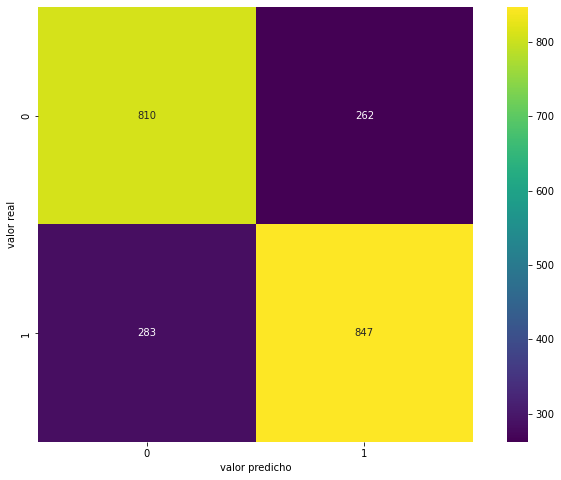

In [15]:
mat_lr3 = confusion_matrix(y_test3, y_pred_test_esta_balan)

plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr3, square=True, annot=True, fmt="d", cmap = "viridis")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

In [16]:
results_logistic_esta_balan = metricas(y_test3, y_pred_test_esta_balan, y_train3, y_pred_train_esta_balan, "Regresión logistica Esta Balan")
results_logistic_esta_balan

,accuracy,precision,recall,f1,kappa,set,modelo
0,0.752498,0.763751,0.749558,0.756588,0.504901,test,Regresión logistica Esta Balan
1,0.754884,0.759916,0.740453,0.750058,0.509665,train,Regresión logistica Esta Balan


En este tenemos unos datos mucho mejores, aunque siguen sin ser buenos.

Tanto accuracy, precision y recall tienen unos valores de ente el 75-76%, y el kappa nos sube hasta el 50% lo cual quiere decir que cuando nuestro modelo acierta acierta el 50% de las veces lo hace al azar.

In [17]:
# Juntamos todos los resultados
resultados_finales = pd.concat([results_logistic_esta, results_logistic_esta_balan], axis = 0)
resultados_finales

,accuracy,precision,recall,f1,kappa,set,modelo
0,0.828000,0.644970,0.277354,0.387900,0.305868,test,Regresión logistica Esta
1,0.820750,0.644628,0.284672,0.394937,0.307786,train,Regresión logistica Esta
0,0.752498,0.763751,0.749558,0.756588,0.504901,test,Regresión logistica Esta Balan
1,0.754884,0.759916,0.740453,0.750058,0.509665,train,Regresión logistica Esta Balan


In [18]:
# Guardamos el csv
resultados_finales.to_csv("../ficheros/resultados_churn_reg_logis.csv")